In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import altair as alt
alt.data_transformers.enable('json')
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Load Dataset

In [2]:
df = pd.read_table()

NameError: name 'df' is not defined

In [4]:

X_train = pd.read_csv('../data/train.csv')
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,35,Private,204621,Assoc-acdm,12,Divorced,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
1,36,Private,250807,11th,7,Never-married,Craft-repair,Not-in-family,Black,Female,0,0,40,United-States,<=50K
2,21,Private,273403,Assoc-voc,11,Never-married,Other-service,Not-in-family,White,Female,0,0,50,United-States,<=50K
3,56,Private,261232,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,20,Private,33644,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
X_train.columns = X_train.columns.str.replace('-', '_') 

numerical = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
categorical = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country','target']

# Getting rid of blanks at the start of categorical features
X_train[categorical] = X_train[categorical].apply(lambda x: x.str.strip())

## Exploring data

In [6]:
X_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.545416,1.898294e+05,10.077242,1039.185772,87.548718,40.386248
std,13.666343,1.056574e+05,2.573230,7167.150640,403.647262,12.395259
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783530e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369922e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
print("The number of Workclasses are : {0}".format(X_train['workclass'].unique().shape[0]))
print("The Workclasses are :\n {0}".format(X_train['workclass'].unique()))

The number of Workclasses are : 9
The Workclasses are :
 ['Private' 'Self-emp-inc' 'Local-gov' 'Self-emp-not-inc' '?' 'State-gov'
 'Federal-gov' 'Without-pay' 'Never-worked']


In [10]:
print("The number of classes of Education are : {0}".format(X_train['education'].unique().shape[0]))
print("The classes of Education are :\n {0}".format(X_train['education'].unique()))

The number of classes of Education are : 16
The classes of Education are :
 ['Assoc-acdm' '11th' 'Assoc-voc' 'HS-grad' '12th' 'Some-college'
 'Bachelors' 'Masters' 'Doctorate' '7th-8th' '1st-4th' 'Prof-school'
 '10th' '9th' '5th-6th' 'Preschool']


In [11]:
print("The number of classes of marital_status are : {0}".format(X_train['marital_status'].unique().shape[0]))
print("The classes of marital_status are :\n {0}".format(X_train['marital_status'].unique()))


The number of classes of marital_status are : 7
The classes of marital_status are :
 ['Divorced' 'Never-married' 'Widowed' 'Married-civ-spouse' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


In [12]:
print("The number of classes of occupation are : {0}".format(X_train['occupation'].unique().shape[0]))
print("The classes of occupation are :\n {0}".format(X_train['occupation'].unique()))


The number of classes of occupation are : 15
The classes of occupation are :
 ['Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial' 'Sales'
 'Protective-serv' 'Prof-specialty' '?' 'Farming-fishing'
 'Transport-moving' 'Handlers-cleaners' 'Machine-op-inspct' 'Tech-support'
 'Priv-house-serv' 'Armed-Forces']


In [13]:
print("The number of classes of relationship are : {0}".format(X_train['relationship'].unique().shape[0]))
print("The classes of relationship are :\n {0}".format(X_train['relationship'].unique()))


The number of classes of relationship are : 6
The classes of relationship are :
 ['Own-child' 'Not-in-family' 'Unmarried' 'Husband' 'Wife' 'Other-relative']


In [14]:
print("The number of classes of race are : {0}".format(X_train['race'].unique().shape[0]))
print("The classes of race are :\n {0}".format(X_train['race'].unique()))


The number of classes of race are : 5
The classes of race are :
 ['White' 'Black' 'Other' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo']


In [15]:
print("The number of classes of sex are : {0}".format(X_train['sex'].unique().shape[0]))
print("The classes of sex are :\n {0}".format(X_train['sex'].unique()))


The number of classes of sex are : 2
The classes of sex are :
 ['Female' 'Male']


In [16]:
print("The number of classes of native_country are : {0}".format(X_train['native_country'].unique().shape[0]))
print("The classes of native_country are :\n {0}".format(X_train['native_country'].unique()))


The number of classes of native_country are : 41
The classes of native_country are :
 ['United-States' 'Poland' '?' 'Mexico' 'Canada' 'China' 'England' 'Haiti'
 'Italy' 'Jamaica' 'Portugal' 'France' 'Philippines' 'India' 'Iran'
 'Dominican-Republic' 'Puerto-Rico' 'Ireland' 'Scotland' 'Cuba' 'Thailand'
 'Yugoslavia' 'South' 'Cambodia' 'Germany' 'Vietnam' 'Guatemala' 'Peru'
 'Columbia' 'Japan' 'Ecuador' 'El-Salvador' 'Laos'
 'Outlying-US(Guam-USVI-etc)' 'Nicaragua' 'Taiwan' 'Trinadad&Tobago'
 'Greece' 'Honduras' 'Hong' 'Hungary']


In [26]:

print("Number of observations with income Class >50K $ = {0}".format(X_train['target'].value_counts()[1]))
print("Number of observations with income Class <=50K $ = {0}".format(X_train['target'].value_counts()[0]))

Number of observations with income Class >50K $ = 6270
Number of observations with income Class <=50K $ = 19778


## Observations

1. Categorical variables - `native_country`, `occupation`, `workclass` having "?" in some places.
2. Outliers present in numerical variables - `capital_gain`,`capital_loss`
3. Target classes are not evenly distributed.

## Relation among different variables

In [28]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,35,Private,204621,Assoc-acdm,12,Divorced,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
1,36,Private,250807,11th,7,Never-married,Craft-repair,Not-in-family,Black,Female,0,0,40,United-States,<=50K
2,21,Private,273403,Assoc-voc,11,Never-married,Other-service,Not-in-family,White,Female,0,0,50,United-States,<=50K
3,56,Private,261232,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,20,Private,33644,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


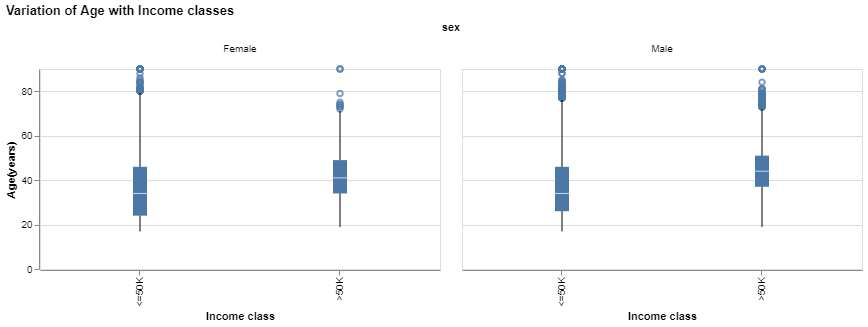

In [13]:
alt.data_transformers.disable_max_rows()

p1 = alt.Chart(X_train).mark_boxplot().encode(
    alt.X('target:O', title = "Income class"),
    alt.Y('age:Q', title = "Age(years)"),
    facet = 'sex:N'
).properties(
    title = "Variation of Age with Income classes",
    width = 400,
    height = 200
)
p1

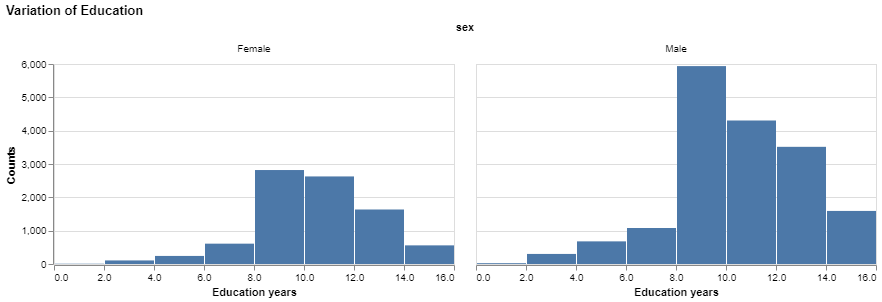

In [75]:

p2 = alt.Chart(X_train).mark_bar().encode(
    alt.X('education_num:Q', bin=alt.Bin(step=2), title = "Education years"),
    alt.Y('count()', title = "Counts"),
    facet = 'sex:N'
).properties(
    title = "Variation of Education",
    width = 400,
    height = 200
)
p2

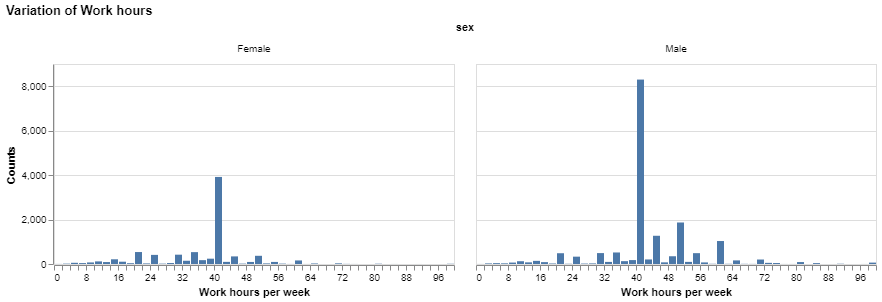

In [76]:
p3 = alt.Chart(X_train).mark_bar().encode(
    alt.X('hours_per_week:Q', bin=alt.Bin(step=2), title = "Work hours per week"),
    alt.Y('count()', title = "Counts"),
    facet = 'sex:N'
).properties(
    title = "Variation of Work hours",
    width = 400,
    height = 200
)
p3

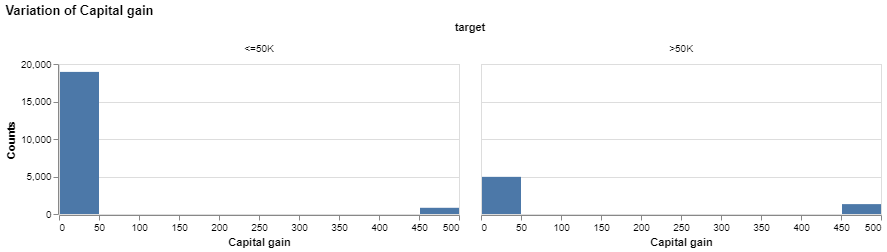

In [11]:

p4 = alt.Chart(X_train).mark_bar().encode(
    alt.X('capital_gain:Q', bin=alt.Bin(extent=[0, 500], step=50), title = "Capital gain"),
    alt.Y('count()', title = "Counts"),
    facet = 'target:N'
).properties(
    title = "Variation of Capital gain",
    width = 400,
    height = 150
)

p5 = alt.Chart(X_train).mark_bar().encode(
    alt.X('capital_loss:Q', bin=alt.Bin(extent=[0, 1000], step=50), title = "Capital loss"),
    alt.Y('count()', title = "Counts"),
    facet = 'target:N'
).properties(
    title = "Variation of Capital loss",
    width = 400,
    height = 150
)

p4

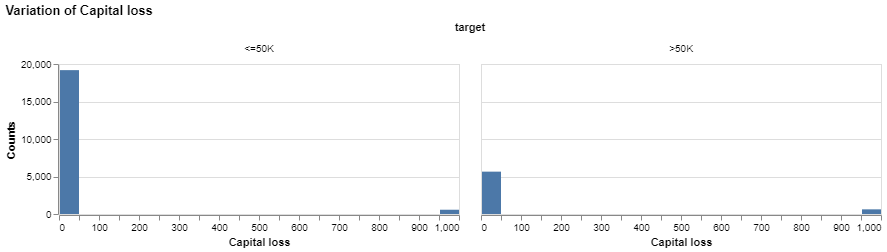

In [12]:
p5

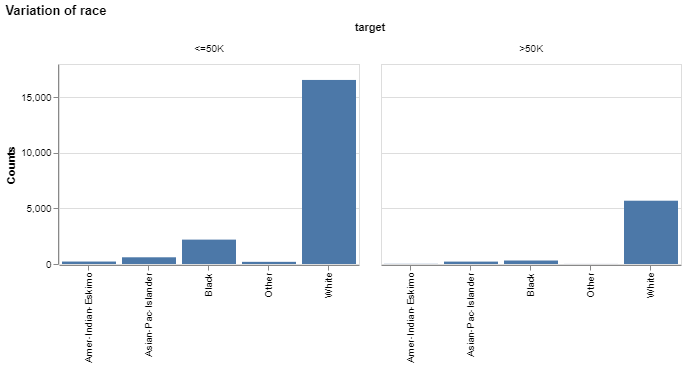

In [79]:

p6 = alt.Chart(X_train).mark_bar().encode(
    alt.X('race:O', title = ""),
    alt.Y('count()', title = "Counts"),
    facet = 'target:N'
).properties(
    title = "Variation of race",
    width = 300,
    height = 200
)
p6

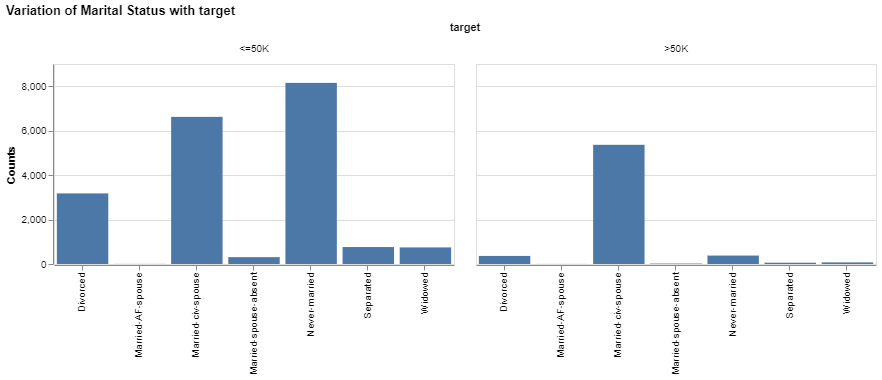

In [80]:
p7 = alt.Chart(X_train).mark_bar().encode(
    alt.X('marital_status:O', title = ""),
    alt.Y('count()', title = "Counts"),
    facet = 'target:N'
).properties(
    title = "Variation of Marital Status with target",
    width = 400,
    height = 200
)
p7

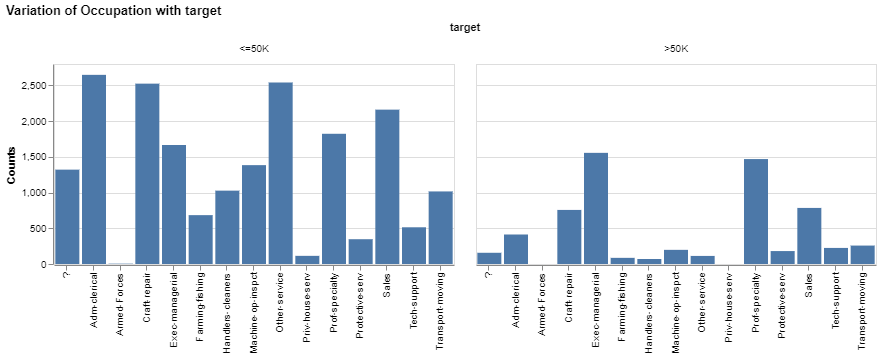

In [82]:
p8 = alt.Chart(X_train).mark_bar().encode(
    alt.X('occupation:O', title = ""),
    alt.Y('count()', title = "Counts"),
    facet = 'target:N'
).properties(
    title = "Variation of Occupation with target",
    width = 400,
    height = 200
)
p8

## Observations from Variable exploration

* Median age for Higher income class(>50K) is higher than lower income class(<=50K) for both genders. This is expected as income increases with age.
* Education is higher among males than females.
* There is not much difference in work hours for males and females. Mostly it is close to 40 hrs per week.
* Capital gains and capital loss has lot of outlier as seen from the decribe() function. Capital gains and losses are mostly concentrated in 0-50 range.
* Whites dominate in the racial distribution in both Income classes followed by Blacks.
* The lower income class has high number of people with marital status - "Never Married" and "Married". But the higher income class is dominated by "Married" people.
* Occupations in the lower income category is higher across all sectors compared to higher income. While jobs in higer income category are dominated by - "Exec-Managerial" and "Prof-specialty".